# Exploratory Data Analysis: Haberman's Dataset

#### ***Haberman's Dataset contains the data of the Breast Cancer Patients who had undergone Surgery.***

***Import Packages***

In [1]:

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns

***Load in dataset and call it haberman_data***

ensure you pass in the parameter header

In [3]:
haberman_data = pd.read_csv('datasets_474_966_haberman.csv')

***Check out head of data***

In [4]:
haberman_data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


***Rename Column***

age = Age of patient

op_yr = Operation year;

ax = Number of Axil Nodes that are detected;

status = Survival Status of the patient after 5 years

In [5]:
haberman_data.columns 

Index(['30', '64', '1', '1.1'], dtype='object')

In [6]:
haberman_col = ['age','op_yr','ax','status']

In [9]:
haberman_data.columns = haberman_col

In [10]:
haberman_data.head()

,age,op_yr,ax,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


***shape of the dataset***

In [11]:
haberman_data.shape

(305, 4)

***Check out the status column and see how it is classified***

In [12]:
haberman_data['status'].value_counts()

1    224
2     81
Name: status, dtype: int64

***Replace the status values***

1 == Survived

2 == Not_survived

In [13]:
haberman_data['status'].replace([1,2],['Survived','Not_survived'],inplace=True)

***Print out the percentage of data classified***

In [15]:
haberman_data['status'].value_counts(normalize=True)*100

Survived        73.442623
Not_survived    26.557377
Name: status, dtype: float64

In [16]:
print('The percentage of patient that survived the surgery 73.44%')
print('The percentage of patient that dont survived the surgery 26.55%')

The percentage of patient that survived the surgery 73.44%
The percentage of patient that dont survived the surgery 26.55%


***Observation:***
input your observation below

* My observation is that 73.44% are likely to survive even after 5 year of surgery. And 26.55% otherwise.

* 

***Check the description of the data***

In [17]:
haberman_data.describe()

,age,op_yr,ax
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


***Observation:*** input your observation below

* I observed that the lowest age is 30 years of age, and the highest is 83 years old.
* The average age is 52.5, which means that 50+ old women are detected of such.
* And also ages of 52 are more having the detection. In addition there is an outlier in 'ax' max. which is 52.(there cannot be 52 axil node detected to be affected.

# Univariate Analysis :

### Histogram

***Reproduce the following Figures***

Text(0.5, 0, 'Age of patient')

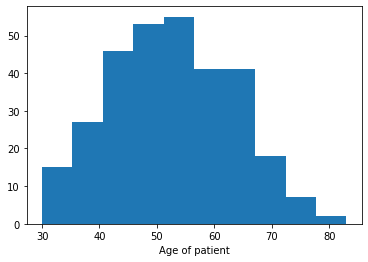

In [18]:
haberman_data['age'].hist(grid=False)
plt.xlabel('Age of patient')

***Hint: Use seaborn FacetGrid***

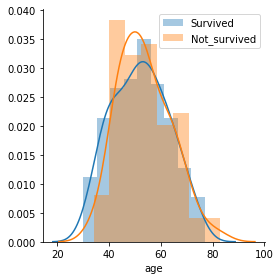

In [20]:
g = sns.FacetGrid(haberman_data, hue="status", height=4, aspect=1)
g = g.map(sns.distplot, "age")
plt.legend()
plt.xlabel('age')
plt.show()

***Observation:*** input your observation below

* 96% of age patient ranging from 47-78 are not likely to survive.
* 50% of age patient at the range of 37 below are also found to survive.

***Reproduce this figures***

Text(0.5, 0, 'Year of Operation')

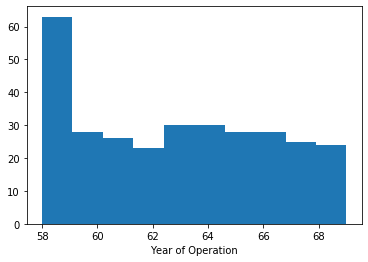

In [21]:
haberman_data['op_yr'].hist(grid=False)
plt.xlabel('Year of Operation')

***Hint: Use seaborn FacetGrid***

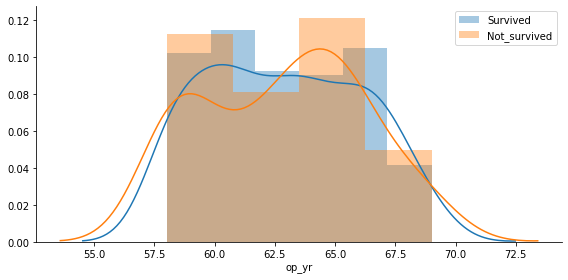

In [22]:
g = sns.FacetGrid(haberman_data, hue="status", height=4, aspect=2)
g = g.map(sns.distplot, "op_yr")
plt.legend()
plt.xlabel('op_yr')
plt.show()

***Observation:*** input your observation below

* 
* hard to read, which means it very poor to be used for training data.
* 

***Reproduce the following figures***

Text(0.5, 0, 'Axil Nodes')

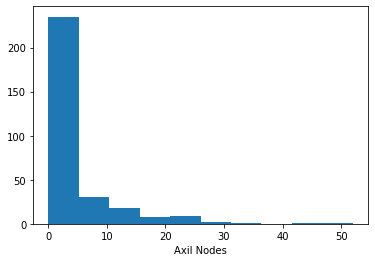

In [23]:
haberman_data['ax'].hist(grid=False)
plt.xlabel('Axil Nodes')

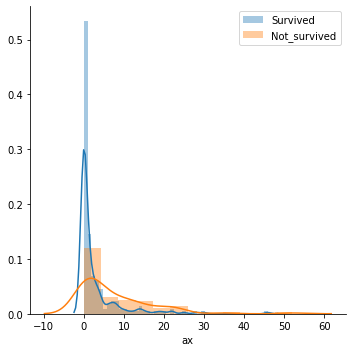

In [26]:
g = sns.FacetGrid(haberman_data, hue='status',height=3, size=5)
g = g.map(sns.distplot,'ax')
plt.legend()
plt.xlabel('ax')
plt.show()

***Observation:*** input your observation below

* I observed that patient with lower axil node are known to survive than those with higher axil nodes. This plot is slightly well separatable from all other plot. it's good for the model. 
* axil node ranging 0-4 are more like to survive and 5 above are likely not to survive.  

# Probability Density Function & Commulative Density Function

## Read Through

***Segregate the data based on the Class Label i.e. Survival Status***

In [100]:
haberman_data_Survived=haberman_data.loc[haberman_data["status"]=="Survived"]

haberman_data_Not_Survived=haberman_data.loc[haberman_data["status"]=="Not_survived"]

***Plotting the PDF,CDF for Age of Patient for the above Segregated Data***

In [101]:
density_age_survived,bin_edges_age_survived=np.histogram(
    haberman_data_Survived['age'],
    bins=10,
    density=True)

pdf_age_survived=(density_age_survived)/(sum(density_age_survived))

In [102]:
density_Age_Not_Survived,bin_Edges_Age_Not_Survived=np.histogram(
    haberman_data_Not_Survived['age'],
    bins=10,
    density=True)

pdf_Age_Not_Survived=(density_Age_Not_Survived)/(sum(density_Age_Not_Survived))

In [103]:
print("Bin Edges Survived : {}\n".format(bin_edges_age_survived))
print("PDF Survived : {}\n".format(pdf_age_survived))
print("Bin Edges Not Survived :{}\n".format(bin_Edges_Age_Not_Survived))
print("PDF Not Survived : {}\n".format(pdf_Age_Not_Survived))

Bin Edges Survived : [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

PDF Survived : [0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]

Bin Edges Not Survived :[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]

PDF Not Survived : [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]



In [104]:
cdf_Age_Not_Survived=np.cumsum(pdf_Age_Not_Survived)
cdf_age_survived=np.cumsum(pdf_age_survived)

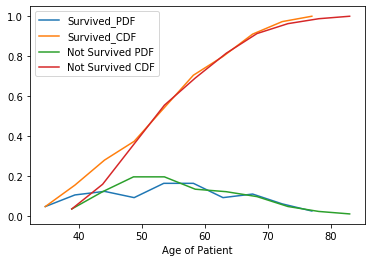

In [116]:
plt.plot(bin_edges_age_survived[1:],pdf_age_survived)
plt.plot(bin_edges_age_survived[1:],cdf_age_survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],pdf_Age_Not_Survived)
plt.plot(bin_Edges_Age_Not_Survived[1:],cdf_Age_Not_Survived)
plt.xlabel('Age of Patient')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :***

* The Survival chances are high for the patients having age less than 40 years.

### To Do 👇

***Plotting the PDF,CDF for Year of Operation for the above Segregated Data***

In [133]:
density_op_yr_survived,bin_edges_op_yr_survived=np.histogram(
    haberman_data_Survived['op_yr'],
    bins=6,
    density=True)

pdf_op_yr_survived=(density_op_yr_survived)/(sum(density_op_yr_survived))

In [134]:
density_op_yr_Not_survived,bin_edges_op_yr_Not_survived=np.histogram(
  haberman_data_Survived['op_yr'],
  bins=6,
  density=True)

pdf_op_yr_Not_survived=(density_op_yr_Not_survived)/(sum(density_op_yr_Not_survived))

In [135]:
print('Bin Edges Survived:{} \n'.format(bin_edges_op_yr_survived))
print("PDF Survival: {} \n".format(pdf_op_yr_survived))
print('Bin Edges Not Survived: {} \n'.format(density_op_yr_Not_survived))
print("PDF Not Survived: {} \n".format(pdf_op_yr_Not_survived))

Bin Edges Survived:[58.         59.83333333 61.66666667 63.5        65.33333333 67.16666667
 69.        ] 

PDF Survival: [0.1875     0.20982143 0.16964286 0.16517857 0.19196429 0.07589286] 

Bin Edges Not Survived: [0.10227273 0.11444805 0.09253247 0.0900974  0.10470779 0.0413961 ] 

PDF Not Survived: [0.1875     0.20982143 0.16964286 0.16517857 0.19196429 0.07589286] 



In [136]:
cdf_op_yr_survived = np.cumsum(pdf_op_yr_survived)

cdf_op_yr_Not_survived = np.cumsum(pdf_op_yr_Not_survived)

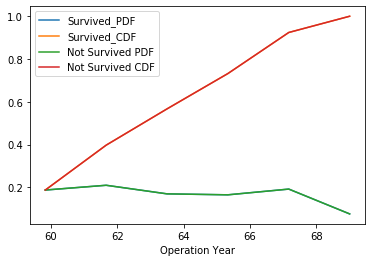

In [137]:
plt.plot(bin_edges_op_yr_survived[1:],pdf_op_yr_survived)
plt.plot(bin_edges_op_yr_survived[1:],cdf_op_yr_survived)
plt.plot(bin_edges_op_yr_Not_survived[1:],pdf_op_yr_Not_survived)
plt.plot(bin_edges_op_yr_Not_survived[1:],cdf_op_yr_Not_survived)
plt.xlabel('Operation Year')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :*** Input your answer below

* Hard to read.

***Plotting the PDF,CDF for Axil Nodes for the above Segregated Data***

In [138]:
density_AxilNode_survived,bins_AxilNode_survived =np.histogram(
 haberman_data_Survived['ax'],
 bins=12,
density = True)

pdf_AxilNode_survived = density_AxilNode_survived/ (sum(density_AxilNode_survived))

In [139]:
density_AxilNode_Not_survived,bins_AxilNode_Not_survived = np.histogram(
haberman_data_Not_Survived['ax'],
 bins=12,
density= True)

pdf_AxilNode_Not_survived = density_AxilNode_Not_survived/ (sum(density_AxilNode_Not_survived))

In [140]:
print('Bin Edges Survived: {} \n'.format(bins_AxilNode_survived))
print('PDF Survived: {} \n'.format(pdf_AxilNode_survived))
print('Bin Edges Not Survived:{} \n'.format(bins_AxilNode_Not_survived))
print('PDF Not Survived:{}\n'.format(pdf_AxilNode_Not_survived))

Bin Edges Survived: [ 0.          3.83333333  7.66666667 11.5        15.33333333 19.16666667
 23.         26.83333333 30.66666667 34.5        38.33333333 42.16666667
 46.        ] 

PDF Survived: [0.79017857 0.09375    0.04464286 0.02678571 0.01339286 0.01339286
 0.00446429 0.00892857 0.         0.         0.         0.00446429] 

Bin Edges Not Survived:[ 0.          4.33333333  8.66666667 13.         17.33333333 21.66666667
 26.         30.33333333 34.66666667 39.         43.33333333 47.66666667
 52.        ] 

PDF Not Survived:[0.51851852 0.13580247 0.11111111 0.09876543 0.04938272 0.0617284
 0.         0.         0.01234568 0.         0.         0.01234568]



In [141]:
cdf_AxilNode_survived = np.cumsum(pdf_AxilNode_survived)
cdf_AxilNode_Not_survived = np.cumsum(pdf_AxilNode_Not_survived)

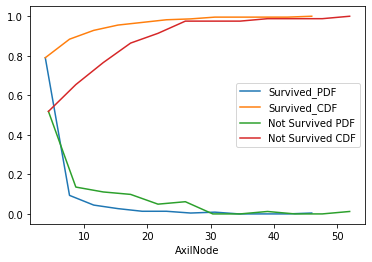

In [142]:
plt.plot(bins_AxilNode_survived[1:],pdf_AxilNode_survived)
plt.plot(bins_AxilNode_survived[1:],cdf_AxilNode_survived)
plt.plot(bins_AxilNode_Not_survived[1:],pdf_AxilNode_Not_survived)
plt.plot(bins_AxilNode_Not_survived[1:],cdf_AxilNode_Not_survived)
plt.xlabel('AxilNode')
plt.legend(['Survived_PDF','Survived_CDF','Not Survived PDF','Not Survived CDF'])

***Observation :*** Input your answer below

* i observed that 80% of those who had <5 axilnode are likely to survive 
* And also we see that almost 100% of those who had >35 axilnode are not likely to survive after 5 years

## Box Plot

***Reproduce the following Images***

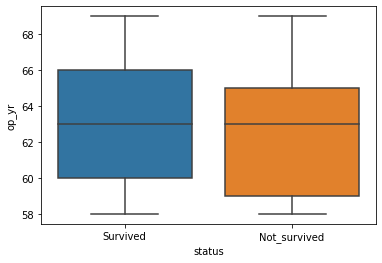

In [149]:
sns.boxplot(x='status',y='op_yr',data=haberman_data)
plt.show()

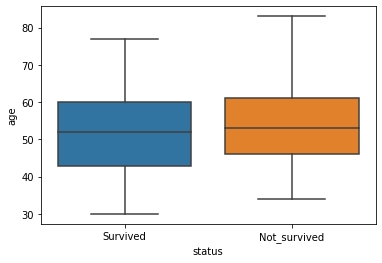

In [150]:
sns.boxplot(x='status',y='age', data=haberman_data)
plt.show()

***Observation :*** Input Your answer below

* 50% of age <51 have more chance of survival
* 25% of age <45 also have more chances of survival
* 50% of age >=53 are not likely to survive

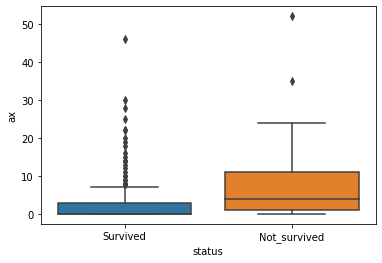

In [151]:
sns.boxplot(x='status',y='ax', data=haberman_data)
plt.show()

***Observation :*** Input Your answer below

* 75% having axilnodes <4 have a greater chances of survival
* 50% having axilnodes >5 don't have the chance of survival. i also notice the outliers.

## Violin Plots

***Reproduce the following images***

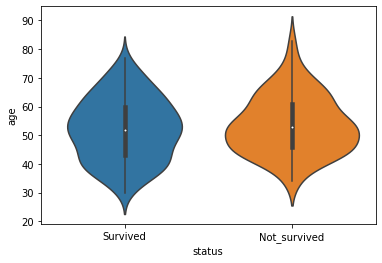

In [153]:
sns.violinplot(x='status',y='age', data=haberman_data)
plt.show()

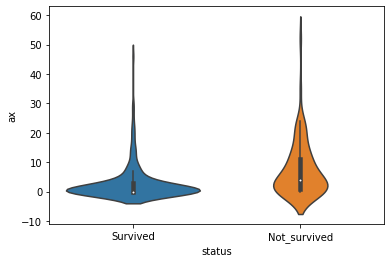

In [154]:
sns.violinplot(x="status",y="ax",data=haberman_data)
plt.show()

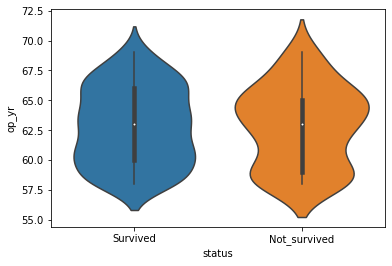

In [155]:
sns.violinplot(x="status",y='op_yr',data=haberman_data)
plt.show()

***Observation :*** Input your answer below

* here we see that 50% of patient who have this cancer dont survive at the earlies 1960's below.
* And as the year goes up at about 1965 and above, more survival are known. this means pratitional are becoming more expert in their profession.

# Bivariate Analysis

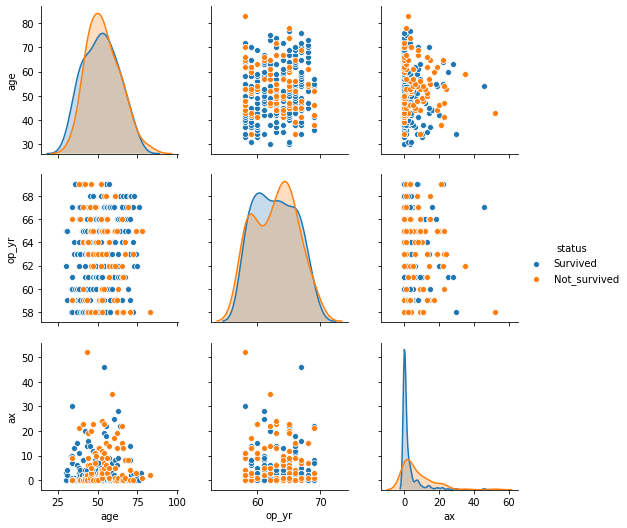

In [157]:
sns.pairplot(data=haberman_data,hue="status")
plt.show()

***Hint: Use FacetGrid***

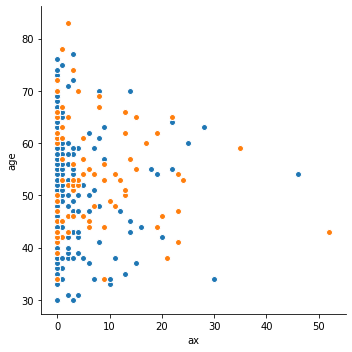

In [166]:
g = sns.FacetGrid(haberman_data,  hue="status",size=5)
g = (g.map(plt.scatter, "ax","age", edgecolor="w").add_legend)


***Observation :*** Input your answer below

* 
* 

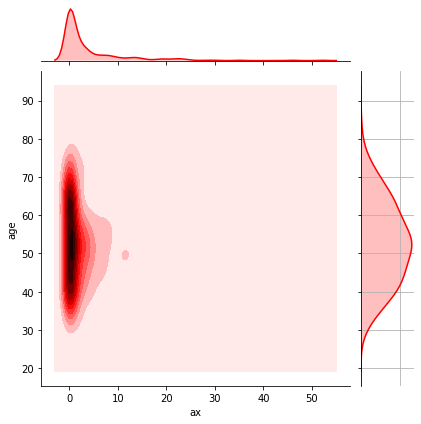

In [188]:
sns.jointplot(x='ax',y='age',data=haberman_data,kind="kde",color='r')
plt.grid()
plt.show()

***Observation :*** Input your answer below

* Age 40 - 60+ have axilnode less than 4. Which means this patient have chances of surviving after 5 year.
* 0-4 axilnodes are high. 
* Axilnodes >4 are range

# Great Job!!!

***Final Conclusions :***

* Haberman's Dataset is Imbalanced Dataset and 73.5% of the patients have survived after the surgery.
* Age of patients is in the range of 30 to 83.
* Operation's are performed during the period 1958-1969.
* The minimum number of Axil Nodes is 0 and maximum is 52 with a mean of 4 axil nodes and 75% patients have less than 5 Axil Nodes.
* Patients aged between 40 and 55 are more in number.
* Patients with age less than 40 years have more chances of survival.
* Major concentration of the patients are having less than 5 Positively detected Axil Nodes.
* Patients having less than 5 Positively Detected Axil Nodes have the highest survival rate (~82%).
* Exact inferences can't be drawn from the above plots.As this is Imbalanced dataset and all the parameters are overlapped, by considering only one parameter we can't infer correctly. The combination of parameters under conditions can infer better.
* Number of Positively Detected Axil Nodes and Age of Patient are the two important parameters, which when combinedly used under conditions can infer better in building a model.